<div style="font-weight:bold;font-size:20px">Introduction:</div>

 
Flora is an online retailer selling mainly decoration household items. While they collected data on their sales for a year starting Dec 2010, they identified that some of their clients were purchasing large quantities per product. This was when they decided to distinguish their customers as personal users, i.e., individual consumers who place small purchases for personal usage/consumption, or small businesses, i.e., they buy from the website as a wholesaler and resell the merchandise on their website.
To serve their clients better, the company decided to launch Flora for Business which gives a 3.5% discount on selected products when ordering more than five units per product. Due to a lack of data, the marketing team is unsure which customers they can target to market the 'Flora for Business' service. Thus, the company is seeking to identify which customers are eligible for this program to engage in direct marketing with their existing customers, who are wholesalers.

  
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<div style="font-weight:bold;font-size:20px">Background:</div>

In our analysis, unsupervised learning helped uncover hidden patterns and structures from unlabeled data. In this case, Flora wished to group its customers into individual buyers and wholesales based on their purchasing behavior without knowing in advance. The team focused on diving the customers into different segments using PCA, which are the principal components. The PCA created another attribute based on our existing observations to group them, which explains the variance in the dataset. After that, our team made clusters, a branch of unsupervised learning that grouped different observations and identified three distinct personas for Flora's customer base. 
The Components are listed below: 
Prime Wholesalers - high total quantity, moderate frequency, high order value, high loyalty
Standard Wholesaler - high total quantity, low frequency, low order value, low loyalty
Regular Individual Buyers - low total quantity, high frequency, moderate order value, moderate loyalty


  
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

Actionable Insights:

From this analysis, we can conclude that Flora should work on retaining the Wholesaler customer base, as they are the vast majority. Notwithstanding, they should also keep in mind that standard wholesalers are not as loyal as prime ones, so they should try to launch loyalty programs to stabilize revenues from that vertical. 
Lastly, they can try to attract more individuals by offering small amounts of products that they can often buy (which is a behavior we have observed among the individuals). Making these purchases more accessible for the individuals might build a loyal customer base that is relatively differentiated.


  
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<div style="font-weight:bold;font-size:20px">The Previous Model:</div>
<br><br>
<div style="font-weight:bold;font-size:20px">The Confusion Matrix</div><br>
The confusion matrix in Python can be read as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
      (14)         |       (32)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
       (2)         |      (199)
                   |
~~~

<br><br>
In terms of our model:<br><br>

~~~
                                      |
  PREDICTED: Is a wholesaler          |  PREDICTED: Is not a wholesaler
  ACTUAL:    Is a wholesaler          |  ACTUAL:    Is a wholesaler        
                                      |
------------------------------------- |------------------------------------
                                      |
  PREDICTED: Is a wholesaler          |  PREDICTED: Is not a wholesaler 
  ACTUAL:    Is not a wholesaler      |  ACTUAL:    Is not a wholesaler 
                                      |  
~~~

In the first part of the assignment, the model that we presented showed a propensity to categorize the customers as "not wholesalers", and while in the majority of the cases, it was right, we had 32 false positives. Furthermore, it also correctly classified most wholesalers, having just two false negatives. 

Our model was trained with an impressive disparity within the data. Indeed, most of the data identified customers as not wholesalers, while the others were categorized as personal. Therefore, it can be said that our model was biased and might easily classify our data as not wholesalers. Consequently, it is necessary to consider using unsupervised learning to create Flora's customers' personas and better understand their shopping patterns.
    


<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [29]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
import statistics as stat
import numpy as np
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

file='./__datasets/floraf2.csv'
# importing the file into colab
flora = pd.read_csv(file) # Dataset is now stored in a Pandas Dataframe

# # specifying file name
#file = './Customer_database.csv'


# # reading the file into Python
#cus_data = pd.read_csv(file)

# Dropping customer_id and total_spent
#customer_df=cus.dropna()
flora['total_quantity']=flora['total_quantity'].fillna(0) # imputing 0 to na
flora['avg_quantity']=flora['avg_quantity'].fillna(0) # imputing 0 to na
flora['total_order_amount_ytd']=flora['total_order_amount_ytd'].fillna(0) # imputing 0 to na
flora['avg_total_order_amount_ytd']=flora['avg_total_order_amount_ytd'].fillna(1) # imputing 1 to na
flora['total_order_amount_Q1']=flora['total_order_amount_Q1'].fillna(1) # imputing 1 to na

# outputting the first ten rows of the dataset
#customer_df.head()
flora.head()

,customer_id,type_of_client,total_ytd_order,total_quantity,avg_quantity,total_order_amount_ytd,avg_total_order_amount_ytd,completed_years_of_education,education_over_age,loyalty,YTD_amount_negative,total_order_amount_Q1,total_order_amount_Q2,total_order_amount_Q3,total_order_amount_Q4,Q4_amount_negative,sex,marital_status,employment_type,occupation,country_of_origins,age,education,completed_years_of_education.1,marital_status.1,relationship_in_household,race
0,760566,NaN,51,105.0,2.0588,123.85,2.428431,14,15.1929,21,1,0.00,0.00,123.85,0.00,1,1,1,Private,Exec-managerial,United-States,47,Masters,14,Married-civ-spouse,Husband,White
1,5977861,NaN,23,65.0,2.8261,137.07,5.959565,15,5.3912,0,1,0.00,137.07,0.00,0.00,1,1,1,Self-emp-not-inc,Prof-specialty,United-States,64,Prof-school,15,Married-civ-spouse,Husband,White
2,5990855,Personal,5,21.0,4.2000,62.65,12.530000,9,1.8000,0,1,0.00,0.00,0.00,62.65,1,0,0,Self-emp-not-inc,Other-service,United-States,25,HS-grad,9,Never-married,Unmarried,White
3,6215488,Wholesaler,227,679.0,2.9912,3005.42,13.239736,8,33.0285,26,1,694.35,1047.40,296.65,967.02,1,1,0,Private,Prof-specialty,United-States,55,12th,8,Widowed,Not-in-family,White
4,6651064,NaN,6,12.0,2.0000,43.99,7.331667,9,1.2000,0,1,0.00,43.99,0.00,0.00,1,1,1,Self-emp-inc,Sales,United-States,45,HS-grad,9,Married-civ-spouse,Husband,White


In [36]:
## Creating a clean table ##
customer_df = pd.DataFrame() 
customer_df['age']=flora['age'] #importing age
customer_df["total_quantity"] =  flora["total_quantity"]
customer_df["avg_quantity"] =  flora["avg_quantity"]
customer_df['total_order_amount_ytd']= np.log(abs(flora['total_order_amount_ytd'])+0.001)

customer_df["education_over_age"] = flora["education_over_age"]# 
customer_df["loyalty"]  =  flora["loyalty"]
customer_df["frequency"]  =  flora["total_ytd_order"]
customer_df["total_order_amount_Q1"] = np.log(abs(flora["total_order_amount_Q1"])+0.001)#
customer_df["total_order_amount_Q2"] = np.log(abs(flora["total_order_amount_Q2"])+0.001)#
customer_df["total_order_amount_Q3"] = np.log(abs(flora["total_order_amount_Q3"])+0.001)#
customer_df["total_order_amount_Q4"] = np.log(abs(flora["total_order_amount_Q4"])+0.001)#
customer_df["occupation"]  =  flora["occupation"]
customer_df["education"]  =  flora["education"]
customer_df["employment_type"]  =  flora["employment_type"]
customer_df["country_of_origins"]  =  flora["country_of_origins"]
customer_df["marital_status.1"]  =  flora["marital_status.1"]
customer_df["relationship_in_household"]  =  flora["relationship_in_household"]
customer_df["race"]  =  flora["race"]

customer_df.info() #showing top 10 results


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4034 non-null   int64  
 1   total_quantity             4034 non-null   float64
 2   avg_quantity               4034 non-null   float64
 3   total_order_amount_ytd     4034 non-null   float64
 4   education_over_age         4034 non-null   float64
 5   loyalty                    4034 non-null   int64  
 6   frequency                  4034 non-null   int64  
 7   total_order_amount_Q1      4034 non-null   float64
 8   total_order_amount_Q2      4034 non-null   float64
 9   total_order_amount_Q3      4034 non-null   float64
 10  total_order_amount_Q4      4034 non-null   float64
 11  occupation                 4034 non-null   object 
 12  education                  4034 non-null   object 
 13  employment_type            4034 non-null   objec

In [37]:
# use purchase behaviors and customer_id
continuous = customer_df.loc[ : , ('total_quantity','frequency','total_order_amount_ytd', 'loyalty')]
                                   
# applying the unsupervised_scaler function
continuous_scaled = unsupervised_scaler(df = continuous)


# checking pre- and post-scaling variance
print(np.var(continuous))
print(np.var(continuous_scaled))

total_quantity            7.146777e+06
frequency                 3.625278e+04
total_order_amount_ytd    2.161229e+00
loyalty                   1.097102e+02
dtype: float64
total_quantity            1.0
frequency                 1.0
total_order_amount_ytd    1.0
loyalty                   1.0
dtype: float64


In [39]:
continuous.corr(method = 'pearson').round(decimals = 2)

,total_quantity,frequency,total_order_amount_ytd,loyalty
total_quantity,1.00,0.35,0.33,0.19
frequency,0.35,1.00,0.43,0.33
total_order_amount_ytd,0.33,0.43,1.00,0.58
loyalty,0.19,0.33,0.58,1.00


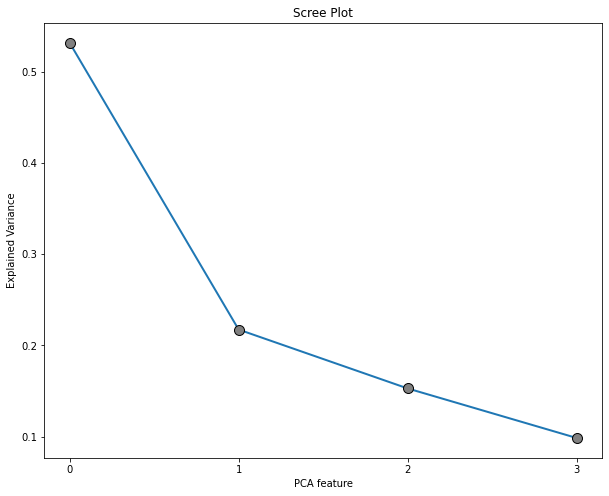

In [38]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(continuous_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)



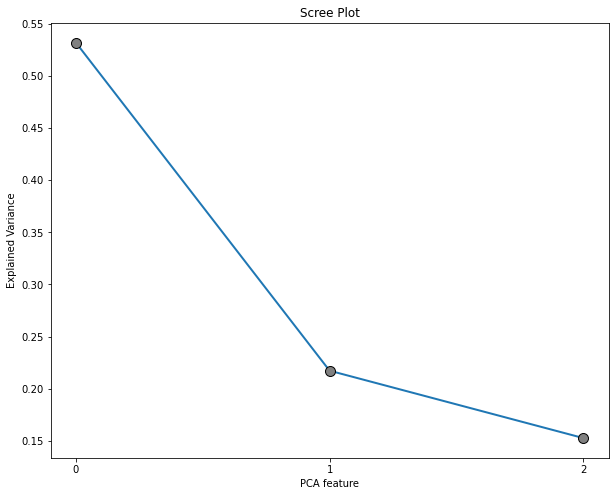

In [40]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 3,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(continuous_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

We set the dimensionality to 3 components from 4 features to avoid overfitting and better balance overall distribution. The first component explains about 54%, the second component 21%, and the last component 15%, which equals 90%. Our three components explained 90% of the variance in the model. If we used factors like total amount, quantity, frequency, and may be used feature engineering to create more factors that would improve the elbow angle. If we could normalize the total amount spent by each customer, we could have more components with a better variance that we could depend on. 

  
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [42]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(continuous_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}""")


MAX Components Factor Loadings
------------------------------
                           0     1     2
total_quantity          0.41  0.75 -0.50
frequency               0.50  0.26  0.82
total_order_amount_ytd  0.57 -0.26 -0.16
loyalty                 0.51 -0.55 -0.22


In [43]:
# naming each principal component (Explained Variance Mean =0.5, .05, .23 for each features
factor_loadings.columns = ['Prime Wholesalers', #high total_quantity, moderate frequency, high order value, high loyalty
                           'Standard Wholesaler',#high total_quantity, low frequency, low order value, low loyalty 
                          'Regular Individual Buyers']   #low total_quantity, high frequency, moderat order value, moderate loyalty

# checking the result
factor_loadings

,Prime Wholesalers,Standard Wholesaler,Regular Individual Buyers
total_quantity,0.406662,0.746096,-0.503917
frequency,0.496875,0.260687,0.820519
total_order_amount_ytd,0.572358,-0.263501,-0.161886
loyalty,0.510046,-0.553128,-0.215890


In [44]:
# analyzing factor strengths per customer
factor_loadings_df = pca.transform(continuous_scaled)

# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings_df)


# renaming columns
factor_loadings_df.columns = factor_loadings.columns


# checking the results
#factor_loadings_df.head(n = 16)
factor_loadings_df.shape

(4034, 3)

In [45]:
# checking variance amongst clusters
np.var(factor_loadings_df)

Prime Wholesalers            2.126999
Standard Wholesaler          0.868978
Regular Individual Buyers    0.610678
dtype: float64

In [46]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_scaled))

Prime Wholesalers            2.126999
Standard Wholesaler          0.868978
Regular Individual Buyers    0.610678
dtype: float64 


Prime Wholesalers            1.0
Standard Wholesaler          1.0
Regular Individual Buyers    1.0
dtype: float64


In [47]:
# INSTANTIATING a k-Means object with three clusters
customers_k_pca = KMeans(n_clusters   = 4,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    2118
3    1898
1      14
2       4
Name: Cluster, dtype: int64


In [55]:

# concatenating categorical information with pca patterns
final_df = pd.concat([customer_df.loc[ : , ['age',
'total_quantity',
'avg_quantity',
'total_order_amount_ytd',
'education_over_age',
'loyalty',
'frequency',
'total_order_amount_Q1',
'total_order_amount_Q2',
'total_order_amount_Q3',
'total_order_amount_Q4',
'occupation',
'education',
'employment_type',
'country_of_origins',
'marital_status.1',
'relationship_in_household',
'race']],factor_loadings_df.round(decimals = 2),
                                            customers_kmeans_pca],
                                            axis = 1)

# converting to a DataFrame
final_df = pd.DataFrame(final_df)


# checking the results
final_df.head(n = 10)

,age,total_quantity,avg_quantity,total_order_amount_ytd,education_over_age,loyalty,frequency,total_order_amount_Q1,total_order_amount_Q2,total_order_amount_Q3,total_order_amount_Q4,occupation,education,employment_type,country_of_origins,marital_status.1,relationship_in_household,race,Prime Wholesalers,Standard Wholesaler,Regular Individual Buyers,Cluster
0,47,105.0,2.0588,4.819079,15.1929,21,51,-6.907755,-6.907755,4.819079,-6.907755,Exec-managerial,Masters,Private,United-States,Married-civ-spouse,Husband,White,-0.01,-0.51,-0.15,3
1,64,65.0,2.8261,4.920499,5.3912,0,23,-6.907755,4.920499,-6.907755,-6.907755,Prof-specialty,Prof-school,Self-emp-not-inc,United-States,Married-civ-spouse,Husband,White,-1.07,0.53,0.16,0
2,25,21.0,4.2000,4.137580,1.8000,0,5,-6.907755,-6.907755,-6.907755,4.137580,Other-service,HS-grad,Self-emp-not-inc,United-States,Never-married,Unmarried,White,-1.43,0.64,0.17,0
3,55,679.0,2.9912,8.008173,33.0285,26,227,6.542978,6.954067,5.692556,6.874220,Prof-specialty,12th,Private,United-States,Widowed,Not-in-family,White,2.02,-0.94,0.04,3
4,45,12.0,2.0000,3.783985,1.2000,0,6,-6.907755,3.783985,-6.907755,-6.907755,Sales,HS-grad,Self-emp-inc,United-States,Married-civ-spouse,Husband,White,-1.57,0.70,0.22,0
5,63,300.0,1.7143,6.342686,25.0075,14,175,-6.907755,-6.907755,-6.907755,6.342686,Prof-specialty,HS-grad,Private,United-States,Married-civ-spouse,Husband,White,0.60,-0.19,0.32,3
6,26,158.0,2.1944,5.830917,19.3824,1,72,-6.907755,5.590319,4.288416,-6.907755,Other-service,11th,Private,Mexico,Never-married,Other-relative,White,-0.53,0.41,0.23,0
7,22,14.0,1.2727,3.893879,5.5000,0,11,-6.907755,-6.907755,3.893879,-6.907755,Adm-clerical,Assoc-voc,Private,United-States,Never-married,Not-in-family,White,-1.51,0.69,0.23,0
8,33,276.0,3.3253,6.910901,32.6937,7,83,-6.907755,5.885662,6.466628,-6.907755,Other-service,Bachelors,Self-emp-inc,Iran,Married-civ-spouse,Husband,Asian-Pac-Islander,0.23,-0.05,0.01,3
9,31,56.0,3.5000,5.545650,5.1616,0,16,-6.907755,-6.907755,-6.907755,5.545650,Craft-repair,Some-college,Private,United-States,Married-civ-spouse,Husband,White,-0.85,0.41,0.06,0


In [56]:
#Distribution of population among each clusters
final_df['Cluster'].value_counts()

0    2118
3    1898
1      14
2       4
Name: Cluster, dtype: int64

In [57]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ['Prime Wholesalers', 
                           'Standard Wholesaler', 
                          'Regular Individual Buyers']   


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Prime Wholesalers,Standard Wholesaler,Regular Individual Buyers
0,-0.65,0.47,0.16
1,6.31,9.61,-7.92
2,11.43,8.72,21.07
3,0.66,-0.61,-0.16


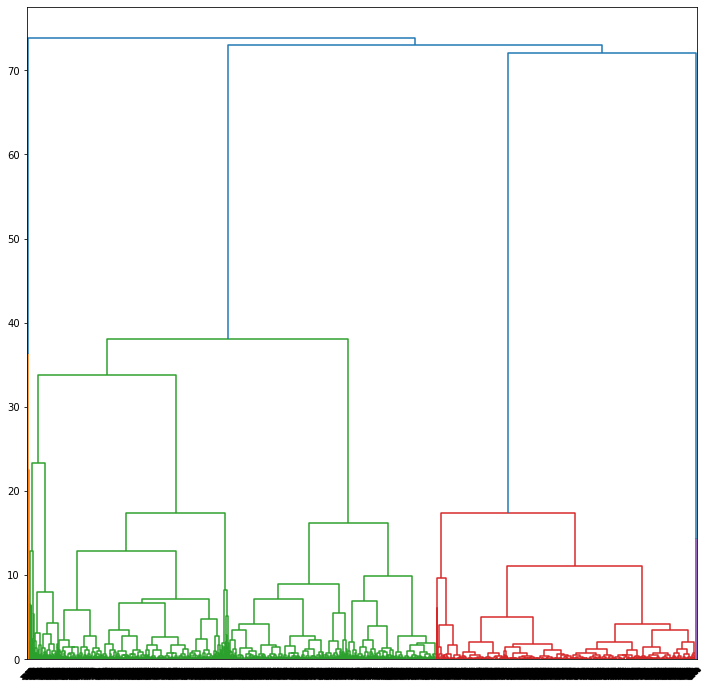

In [58]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 45,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In the dendrogram, we have branches arranged to show distance or variance between different observations. The shorter the height, the more similarities they have. The dendrogram worked out the best way to allocate components or attributes to clusters. In our model we can see that clusters 0 and 3 are most similar, as the height of the link that joins them together is the smallest. The next two most similar objects are 1 and 2. The dendrogram shows us that the big difference between clusters is between the cluster of 0 and 2 versus that of 0, and 3 or 1 and 4.

Selected cluster size to be 4 because initially setting to 3 and found there were some outliers and negative values for returned products. Assuming that the customers will pay at some point we took the absolute value of the negative values. That helped eliminate the extreme branches
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [31]:
# dynamic string with value counts for each demographic for all clusters
for i in range(0,4): # from cluster to 0 - 3
    print(f"""\
 -----------
| Cluster {i} |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == i]) /
       len(final_df), ndigits = 4)}


Centroids 
---------
{centroids_pca_df.loc[ i , :].to_string(dtype = False, name = False)}


Occupation
-------
{final_df.loc[ : , "occupation"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
         
Employment_type
-------
{final_df.loc[ : , "employment_type"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}         


Marital Status
-------------

{final_df.loc[ : , "marital_status.1"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}


Race
-----
{final_df.loc[ : , "race"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}



Relationship_in_household
------------------------
{final_df.loc[ : , "relationship_in_household"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}


 
  
Education
------
{final_df.loc[ : , "education"][ final_df.loc[ : , "Cluster" ] == i]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
    """)

 -----------
| Cluster 0 |
 -----------

Proportion of Observations
--------------------------
0.525


Centroids
---------
Prime Wholesalers           -0.65
Standard Wholesaler          0.47
Regular Individual Buyers    0.16


Occupation
-------
Adm-clerical         0.12
Craft-repair         0.14
Exec-managerial      0.12
Farming-fishing      0.03
Handlers-cleaners    0.04
Machine-op-inspct    0.06
Other-service        0.10
Priv-house-serv      0.00
Prof-specialty       0.18
Protective-serv      0.02
Sales                0.11
Tech-support         0.03
Transport-moving     0.05
         
Employment_type
-------
Federal-gov         0.03
Local-gov           0.05
Private             0.77
Self-emp-inc        0.03
Self-emp-not-inc    0.07
State-gov           0.04
Without-pay         0.00         


Marital Status
-------------

Divorced                 0.13
Married-AF-spouse        0.00
Married-civ-spouse       0.46
Married-spouse-absent    0.01
Never-married            0.32
Separated       

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<div style="font-weight:bold;font-size:20px">Summary analysis:</div>

As seen from the previous information, we can distinguish four different clusters:
<br><br>
Low-Income Wholesaler: Cluster 0 represents the Low-Income Wholesaler. From a demographic standpoint, this wholesaler is white, Married, and works for a private company. However, this wholesaler has an HS diploma and is a craft-repair employee instead of being an executive. We expect this wholesaler to have a lower income than the others.
<br><br>
Wealthy Wholesaler: Cluster 1 represent the rich wholesaler. The majority of these persona are either executives or work for private employers. They are married and white. They have a bachelor's degree, so we expect them to have a higher income than the other personas. 
<br><br>
Recurrent buyer Wholesalers: Cluster 3 represents the Prime Wholesaler, around 66% of the whole population. This persona has a Professional Speciality, works for a private employer, is white, married, and has an HS diploma. These personas are the ones that buy with the most consistency among the others. 
<br><br>
Individual Buyer: Cluster 2 represents the Regular Individual Buyers, around 21% of the population. Most of these personas are executives, work for a private employer, and are white. They are also married and have an HS diploma. They buy with the highest frequency and don't show loyalty, which makes sense as they are individuals making purchases. 
 <br>
 <br>
From this analysis, we can conclude that Flora shold keep nurishing the Wholesaler customer base, as their are the vast majority. Nothwithstanding, they should also keep in mind that standard wholesalers are not as loyal as prime ones, so they should try to launch loyalty programs to stabilize revenues from that vertical. 
Lastly, they can try to attract more indiviudals by offering small amounts of product that they can buy often (which is a behavior we have observed among the individuals). Making these purchases easier for the individuals might build a loyal customer base that is fairly differenciated.

<br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />